# Factors of Japan's Declining Population

## Introduction
In the past few years, there has been a notable decline in Japan's population. In this project, I will analyze how factors such as wage, living cost, working hours, cost of raising a child, and female employment rate correlate to the declining population in Japan.

In addition, I will use a regression model to predict the future population of Japan. 

## Datasets
- [Historical Population of Japan](https://www.kaggle.com/jd1325/japan-population-data)
- [Number of Births](https://www.e-stat.go.jp/en/stat-search/files?page=1&layout=datalist&toukei=00450011&tstat=000001028897&cycle=7&year=20190&month=0&tclass1=000001053058&tclass2=000001053061&tclass3=000001053064&result_back=1&tclass4val=0)
- [Number of Deaths](https://www.statista.com/statistics/1011901/japan-number-deaths-by-prefecture/)
- [Population Density for Each Prefecture](https://stats-japan.com/t/kiji/13400)
- [Osaka Income by Age Group](https://clabel.me/incomes/81117)
- [Okinawa Income by Age Group](https://clabel.me/incomes/81147)
- [Osaka Work Hours by Age Group](https://www.e-stat.go.jp/dbview?sid=0003009701)
- [Okinawa Work Hours by Age Group](https://www.e-stat.go.jp/dbview?sid=0003009701)
- [Female Employment Rate](https://www.gender.go.jp/about_danjo/whitepaper/r02/zentai/html/zuhyo/zuhyo01-02-03.html)

## References
- [Osaka Cost of Living](https://www.stat.go.jp/data/kakei/2.html)
- [Okinawa Cost of Living](https://lifullhomes-index.jp/info/money-data/household/okinawa-pref/okinawa-city/)
- [Cost of Raising a Child](https://www.fukoku-life.co.jp/gakushi/trivia/trivia22/index.html)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from japanmap import picture
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_notebook
output_notebook()
from sklearn import linear_model

Loading BokehJS ...

In [30]:
# Uncomment following line to install japanmap
#!pip install japanmap

In [47]:
population = pd.read_csv("https://raw.githubusercontent.com/yutaot/Japan-Population-Analysis/main/Japan_population_data.csv")
historical_population = population.groupby("year").sum().drop(columns = ["estimated_area"])
p = figure(
    sizing_mode="stretch_width", 
    max_width=750, 
    height=500,
    title="Historical Population of Japan",
    x_axis_label="Year",
    y_axis_label="Population"
)
line = p.line(historical_population.index, historical_population['population'])
p.add_tools(HoverTool(tooltips="Population: @y", renderers=[line], mode="vline"))
show(p)
historical_population.tail()

,population
year,
1995.75,125570246.0
2000.75,126925843.0
2005.75,127767994.0
2010.75,128057352.0
2015.75,127110047.0


From the historical population graph and a snippet of the dataset table above, the population of Japan had an increasing trend from the late 1800s to early 2000s. However, during the 1990s, the growth gradually slowed down and at around 2010, the population reached its historic maximum and started to decline. We see that around the time of World War 1 and 2, population had a sharp decline, but the context of the current decline is different. There are currently no wars Japan is actively taking part in and the slope behavior approaching the decline is different compared to the decline experienced in the 1920s and 1940s. We see the current decline is more gradual whereas the previous declines were relatively sharp. 

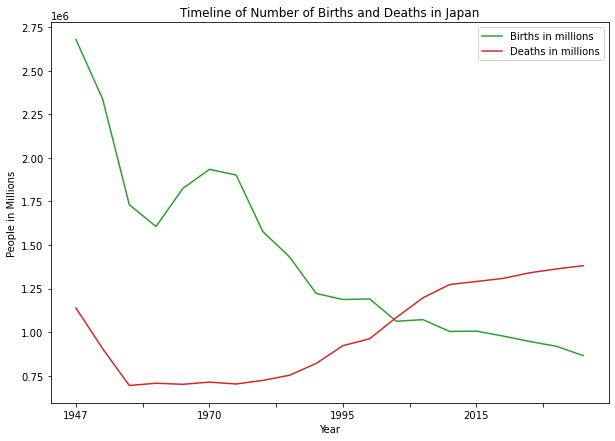

In [48]:
birth_data = pd.read_csv("https://raw.githubusercontent.com/yutaot/Japan-Population-Analysis/main/birth_dataset.csv")
birth_data = birth_data.drop(columns=['Prefecture', '1935']).T[0]

death_data = pd.read_csv("https://raw.githubusercontent.com/yutaot/Japan-Population-Analysis/main/death_dataset.csv")
death_data = death_data.drop(columns=['Prefecture']).T[0]
for i in range(len(death_data)):
    death_data[i] = int(death_data[i])

ax = birth_data.plot(label='Births in millions', figsize=(10,7), color='tab:green')
ax = death_data.plot(label='Deaths in millions', color='tab:red')
ax.set(
    title='Timeline of Number of Births and Deaths in Japan',
    xlabel='Year',
    ylabel='People in Millions'
)
leg = ax.legend()

Despite the number of deaths increasing which may contribute to the fact that there is a declining population, we can also observe that the number of births are also declining. The declining birth rate indicates that there may be factors in society that impact the decline of birth rate. In this project, I will mainly focus on the factors that affect birth rate instead of reasons for in the increase in deaths as that may be caused by a larger population of elderly people. 

[Text(0.5, 1.0, 'Change in Population for Each Prefecture (2019)'),
 Text(0.5, 0, 'Prefecture'),
 Text(0, 0.5, 'Change in Population')]

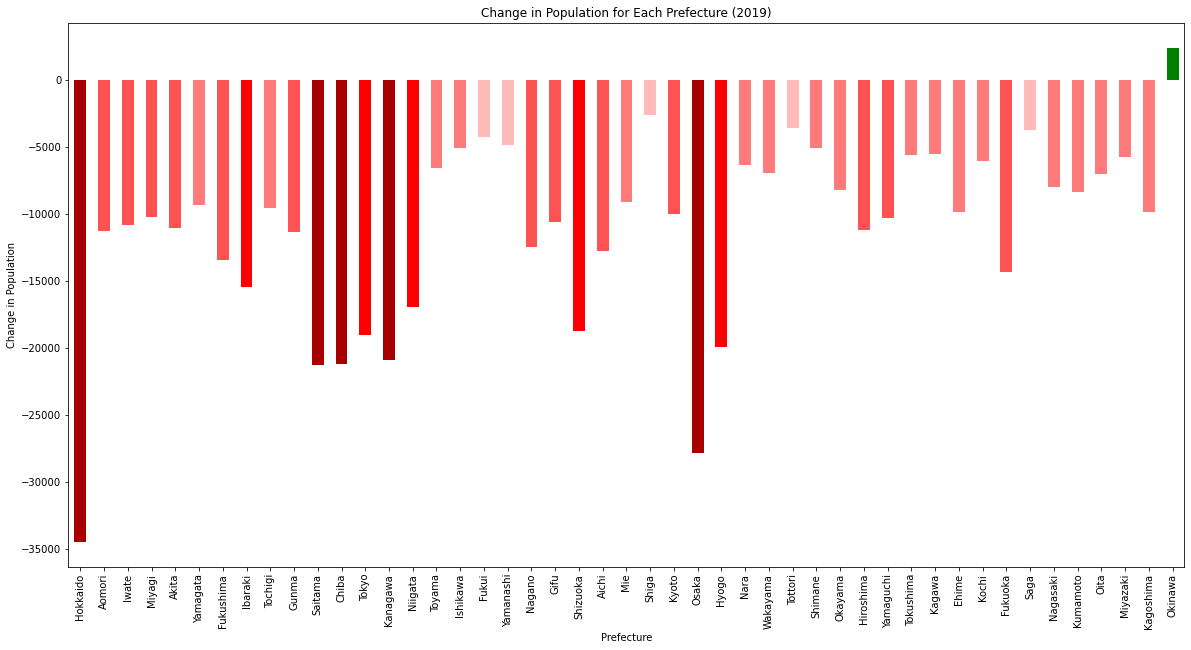

In [10]:
birth_data = pd.read_csv("https://raw.githubusercontent.com/yutaot/Japan-Population-Analysis/main/birth_dataset.csv")
birth_data = birth_data.set_index(["Prefecture"])
to_drop = ["1935", "1947", "1950", "1955", "1960", "1965", "1970", "1975", "1980", "1985", "1990", "1995", "2000", "2005", "2010", "2014", "2015", "2016", "2017", "2018"]
birth_data = birth_data.drop(columns = to_drop)

death_data = pd.read_csv("https://raw.githubusercontent.com/yutaot/Japan-Population-Analysis/main/death_dataset.csv")
death_data = death_data.set_index(["Prefecture"])
to_drop.remove("1935")
death_data = death_data.drop(columns = to_drop)

def chooseBarColor(x):
    x = int(x)
    if x > 0:
        return 'green'
    elif x > -5000:
        return '#ffbaba'
    elif x > -10_000:
        return '#ff7b7b'
    elif x > -15_000:
        return '#ff5252'
    elif x > -20_000:
        return '#ff0000'
    else:
        return '#a70000'

def parseOnlyName(x):
    return "".join(filter(str.isalpha, x))

change_prefecture = birth_data
change_prefecture = change_prefecture.rename(columns={"2019": "change_in_pop"})
for i in range(0, 48):
    change_prefecture["change_in_pop"][i] = birth_data["2019"][i] - death_data["2019"][i]
change_prefecture = change_prefecture.drop("Total")
change_prefecture.index = change_prefecture.index.map(lambda x: parseOnlyName(x))
ax = change_prefecture['change_in_pop'].plot.bar(legend=None, figsize=(20,10), color=change_prefecture["change_in_pop"].map(lambda x: chooseBarColor(x)))
ax.set(
    title="Change in Population for Each Prefecture (2019)",
    xlabel="Prefecture",
    ylabel="Change in Population",
)

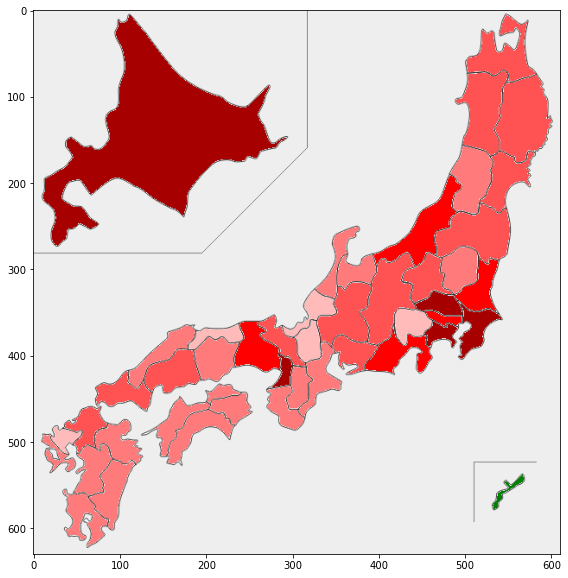

In [11]:
pref_color = {}
for i in range(0, len(change_prefecture['change_in_pop'])):
    pref_color[i+1] = chooseBarColor(change_prefecture['change_in_pop'][i])

pct = picture(pref_color)
fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(pct)

Here we can observe that all but one prefecture has a declining population in 2019. 

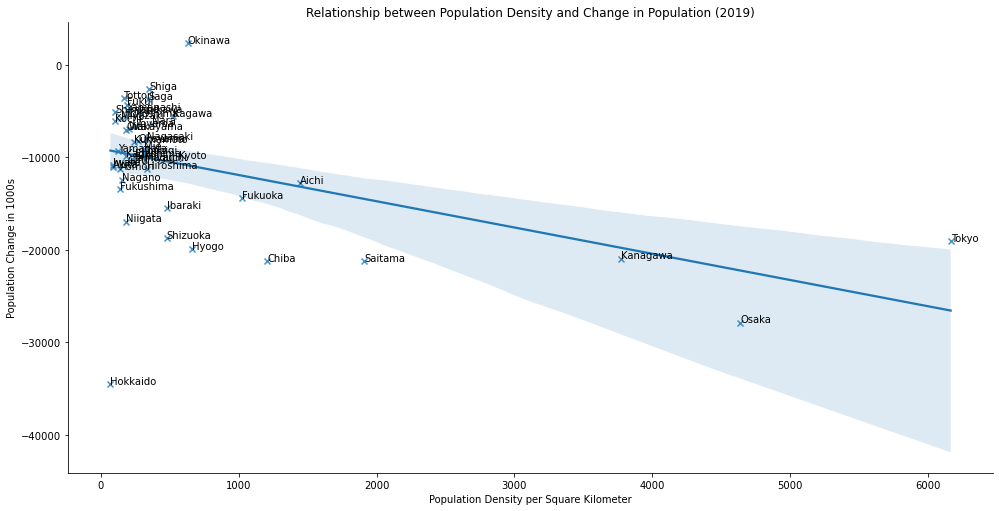

In [12]:
density_per_sqkm = pd.read_csv("https://raw.githubusercontent.com/yutaot/Japan-Population-Analysis/main/prefecturepopdensity2015.csv")
density_pre_sqkm = density_per_sqkm.T.rename(columns={0: 'pop_density'})

change_density_pop = pd.merge(change_prefecture, density_pre_sqkm, left_index=True, right_index=True)
ax = sns.lmplot(x="pop_density", y="change_in_pop", markers="x", height=7, aspect=2, palette="Set1", data=change_density_pop)
change_density_pop['prefecture'] = change_density_pop.index
ax.set(
    title="Relationship between Population Density and Change in Population (2019)",
    xlabel="Population Density per Square Kilometer",
    ylabel="Population Change in 1000s"
)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
label_point(change_density_pop.pop_density, change_density_pop.change_in_pop, change_density_pop.prefecture, plt.gca())  

As we can observe from the scatter plot and the best fit line, the larger the population density, there tends to be a larger decline in population. Notably, larger prefectures such as Tokyo, Osaka, and Kanagawa contribute the most to the decline of population. For this project, I will focus on the analysis of Osaka as it has the 2nd highest density and 2nd largest decline in population. Additionally, I will compare Osaka and Okinawa's datasets as Okinawa is the only prefecture in Japan that has an increasing population. By comparing these two opposites, we might be able to gain insight into the factors that affect population decline. 

[Text(0.5, 1.0, 'Average Income After Tax by Age Group in Osaka (2020)'),
 Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'Million Yen')]

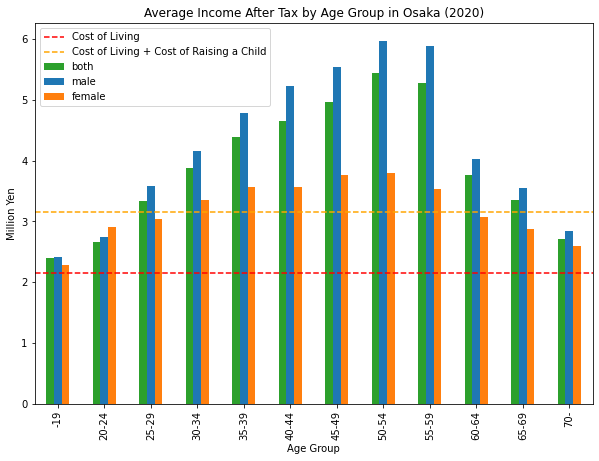

In [13]:
def calculateAfterTaxIncome(x):
    if x < 1.95:
        return x*.95
    elif x < 3.3:
        return x*.9
    elif x < 6.95:
        return x*.8
    else:
        return x*.77

avg_wage_by_age_group_data = {
    'age_group': ['-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-'], 
    'both':[2.66, 3.33, 4.17, 4.85, 5.49, 5.82, 6.20, 6.80, 6.61, 4.70, 4.19, 3.39],
    'male':[2.69, 3.43, 4.48, 5.21, 5.99, 6.53, 6.92, 7.75, 7.64, 5.03, 4.44, 3.56],
    'female':[2.54, 3.23, 3.80, 4.20, 4.46, 4.46, 4.70, 4.74, 4.42, 3.84, 3.20, 2.89]
}

for i in range(len(avg_wage_by_age_group_data['both'])):
    avg_wage_by_age_group_data['both'][i] = calculateAfterTaxIncome(avg_wage_by_age_group_data['both'][i])
    avg_wage_by_age_group_data['male'][i] = calculateAfterTaxIncome(avg_wage_by_age_group_data['male'][i])
    avg_wage_by_age_group_data['female'][i] = calculateAfterTaxIncome(avg_wage_by_age_group_data['female'][i])

avg_wage_by_age_group = pd.DataFrame(data=avg_wage_by_age_group_data)
avg_wage_by_age_group.index = avg_wage_by_age_group['age_group']
avg_wage_by_age_group = avg_wage_by_age_group.drop(columns=['age_group'])
ax = avg_wage_by_age_group.plot.bar(color=['tab:green', 'tab:blue', 'tab:orange'], figsize=(10,7))
ax.axhline(y=2.15, color='r', linestyle='--', label='Cost of Living')
ax.axhline(y=2.15+1, color='orange', linestyle='--', label='Cost of Living + Cost of Raising a Child')
leg = ax.legend()
ax.set(
    title="Average Income After Tax by Age Group in Osaka (2020)",
    xlabel="Age Group",
    ylabel="Million Yen"
)

Based on the statistics of the *Household Income and Expenditure January-March 2021* by the Statistics Bureau, Ministry of Internal Affairs and Communications, the average cost of living in Osaka for 1 person was 179,193 yen per month. Roughly, this would be `2,150,316 yen` annually as displayed by the dotted red line on the graph above. 

Based on a link provided in the References section, the under-approximation of the cost of raising a child is `1,000,000 yen` annually (only the essential fees and attending a public school, not a private school etc). The orange line on the graph shows the `cost of living + cost of raising a child` and the section of the bar that remains will be the remaining amount of money from income. Since the red line displayed only considers the cost of living for 1 person, it is an under-approximation if there were to be a mother, father, and a child. Raising a child would ideally have a mother and a father so as family members increase, the red line would shift upwards, which would also shift the orange line upwards by an offset. Based on the under-approximations, assuming 1 person of the family has income, a family in their 20-24s would not have enough funds from income to raise a child and a family in their 25-29s realistically also would not be able to raise a child in Osaka. Families where the person with the income is in their 30s would potentially be able to provide enough financial power to raise a child but it may still be difficult as the orange line is only an under-approximation for the cost of raising a child. 

Now let's compare this to the average wage by age group in Okinawa. According to the data provided by the link above, the average cost of living in Okinawa for 1 person was approximately `123,000,000 yen` annually. 

[Text(0.5, 1.0, 'Average Income After Tax by Age Group in Okinawa (2020)'),
 Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'Million Yen')]

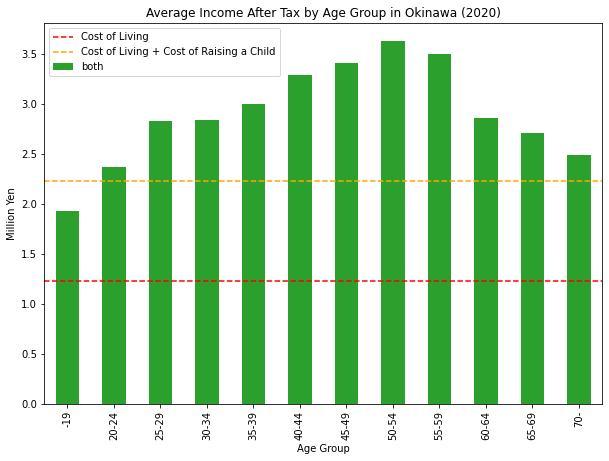

In [14]:
avg_wage_by_age_group_okinawa_data = {
    'age_group': ['-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-'], 
    'both': [2.15, 2.63, 3.15, 3.55, 3.76, 4.12, 4.27, 4.54, 4.38, 3.18, 3.01, 2.77]
}

for i in range(len(avg_wage_by_age_group_data['both'])):
    avg_wage_by_age_group_okinawa_data['both'][i] = calculateAfterTaxIncome(avg_wage_by_age_group_okinawa_data['both'][i])

avg_wage_by_age_group_okinawa = pd.DataFrame(data=avg_wage_by_age_group_okinawa_data)
avg_wage_by_age_group_okinawa.index = avg_wage_by_age_group_okinawa['age_group']
avg_wage_by_age_group_okinawa = avg_wage_by_age_group_okinawa.drop(columns=['age_group'])
ax = avg_wage_by_age_group_okinawa.plot.bar(color=['tab:green'], figsize=(10,7))
ax.axhline(y=1.23, color='r', linestyle='--', label='Cost of Living')
ax.axhline(y=1.23+1, color='orange', linestyle='--', label='Cost of Living + Cost of Raising a Child')
leg = ax.legend()
ax.set(
    title="Average Income After Tax by Age Group in Okinawa (2020)",
    xlabel="Age Group",
    ylabel="Million Yen"
)

Contrary to Osaka, families in their 20-24s, though financially difficult, are able to raise a child. Families in their 25-29s also has more money left over compared to Osaka. Although the two dotted lines are an under-approximation, we can observe that families in Okinawa have more money to work with in their 20s compared to Osaka. This may be a crucial factor to why only Okinawa has a rising population and the rest of the prefectures has a declining population. 

[[<matplotlib.axis.YTick at 0x7f1ca5daf8b0>,
 Text(0.5, 1.0, 'Average Living Cost Spent from Average Income in Percentage'),
 Text(0, 0.5, 'Percentage of Living Cost from Wage'),
 Text(0.5, 0, 'Age Group')]

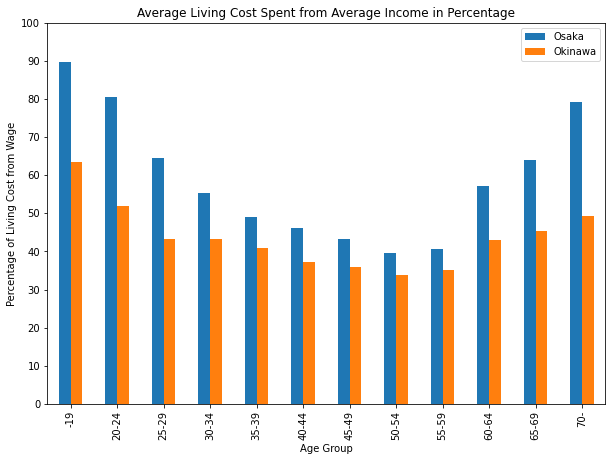

In [15]:
def calculatePercentage(x, avg_cost):
    return avg_cost/x * 100

cost_percent_osaka = avg_wage_by_age_group.drop(columns=['male', 'female'])
cost_percent_osaka['both'] = cost_percent_osaka['both'].map(lambda x: calculatePercentage(x, 2.15))
cost_percent_osaka = cost_percent_osaka.rename(columns={'both':'Osaka'})

cost_percent_okinawa = avg_wage_by_age_group_okinawa
cost_percent_okinawa['both'] = cost_percent_okinawa['both'].map(lambda x: calculatePercentage(x, 1.23))
cost_percent_okinawa = cost_percent_okinawa.rename(columns={'both':'Okinawa'})

cost_percent = pd.merge(cost_percent_osaka, cost_percent_okinawa, left_index=True, right_index=True)
ax = cost_percent.plot.bar(figsize=(10,7))
ax.set(
    yticks=range(0,110, 10),
    title='Average Living Cost Spent from Average Income in Percentage',
    ylabel='Percentage of Living Cost from Wage',
    xlabel='Age Group'
)

This comparison shows that the average percentage of after tax income spent on living costs were higher in Osaka than in Okinawa for all age groups. This indicates that people in Osaka tend to have less money left to spend for themselves or possibly save money to raise a child. It would make raising a child more difficult in Osaka as living cost dictates more than half of their earnings until their early 30s. Contrary to Osaka, Okinawa on average tend to spend less on living costs, which may be one factor of why birth rates are high in Okinawa; people are more financially stable to raise a child.

[Text(0.5, 1.0, 'Weekly Work Hours for Each Age Group (2020)'),
 Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'Hours')]

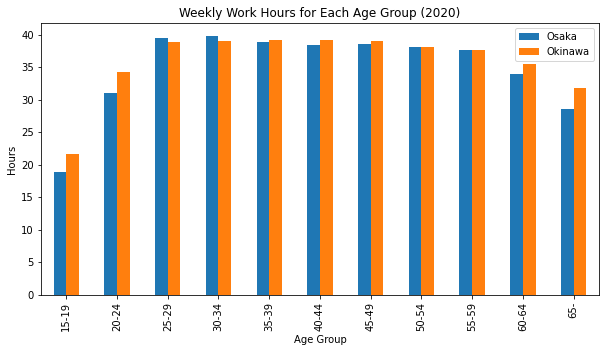

In [16]:
work_hours_osaka = {
    'age_group': ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-'],
    'hours_osaka': [18.9, 31.0, 39.4, 39.8, 38.8, 38.4, 38.5, 38.1, 37.6, 33.9, 28.5]
}
avg_work_hours_osaka = pd.DataFrame(data=work_hours_osaka)
avg_work_hours_osaka.index = avg_work_hours_osaka['age_group']
avg_work_hours_osaka = avg_work_hours_osaka.drop(columns=['age_group'])

work_hours_okinawa = {
    'age_group': ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-'],
    'hours_okinawa': [21.7, 34.3, 38.8, 39.0, 39.2, 39.2, 39.0, 38.1, 37.6, 35.5, 31.8]
}
avg_work_hours_okinawa = pd.DataFrame(data=work_hours_okinawa)
avg_work_hours_okinawa.index = avg_work_hours_okinawa['age_group']
avg_work_hours_okinawa = avg_work_hours_okinawa.drop(columns=['age_group'])

avg_work_hours = pd.merge(avg_work_hours_osaka, avg_work_hours_okinawa, left_index=True, right_index=True)
avg_work_hours = avg_work_hours.rename(columns={'hours_osaka':'Osaka', 'hours_okinawa': 'Okinawa'})
ax = avg_work_hours.plot.bar(figsize=(10,5))
ax.set(
    title='Weekly Work Hours for Each Age Group (2020)',
    xlabel='Age Group',
    ylabel='Hours'
)

The work hours for each age group tends to be a relatively typical amount of work hours and nothing too extreme. However, this dataset does not provide any overtime hours as I had difficulties finding data from the government website that discloses overtime hours. Comparing Osaka and Okinawa's work hours, they have relatively similar work hours and it suggests that work hours may not be a significant factor for the decline in Osaka's population. 

[[<matplotlib.axis.YTick at 0x7f1ca5b6f910>,
 Text(0.5, 1.0, 'Female Employment Rate'),
 Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'Percentage of Female Workers')]

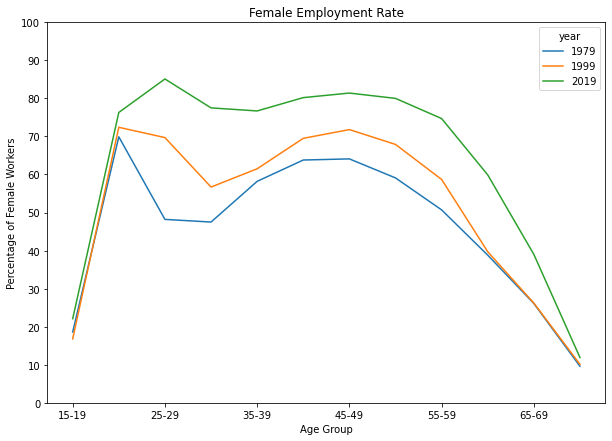

In [17]:
female_employment = pd.read_csv("https://raw.githubusercontent.com/yutaot/Japan-Population-Analysis/main/female_employ.csv")
female_employment.index = female_employment['year']
female_employment = female_employment.drop(columns=['year'])
female_employment = female_employment.T
ax = female_employment.plot(figsize=(10,7))
ax.set(
    yticks=range(0,110, 10),
    title='Female Employment Rate',
    xlabel='Age Group',
    ylabel='Percentage of Female Workers'
)

As displayed on the graph above, compared to 1979 and 1999, female employment rate has increased in 2019 and more women are working. This suggests that female employment is a factor that contributes to the decline of Japan's population as it becomes harder to raise a child if both parents work and do not stay at home to nurture the child. 

## Predicting Population using Linear Regression

Fit model: population = -1373089161.1322 + 747705.8081 year
The model predicts in 2030 the population of Japan would be 144753629.27


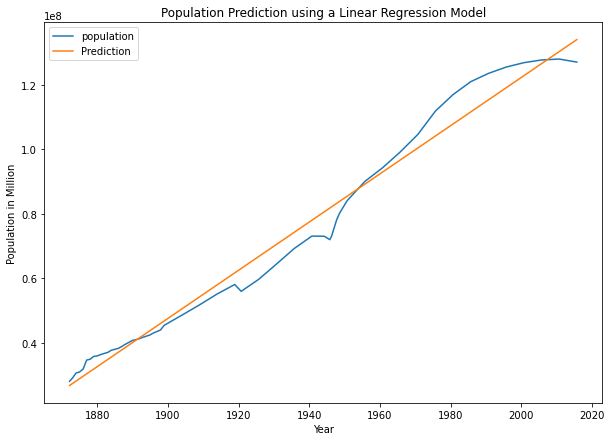

In [52]:
y = historical_population['population']
X = historical_population.reset_index()

population_model = linear_model.LinearRegression()
population_model.fit(X[["year"]], y)

beta_0 = population_model.intercept_
beta_1 = population_model.coef_[0]
print(f"Fit model: population = {beta_0:.4f} + {beta_1:.4f} year")

ax = historical_population.plot(figsize=(10,7))
ax.set(
    title='Population Prediction using a Linear Regression Model',
    xlabel='Year',
    ylabel='Population in Million'
)

x = np.array([historical_population.index.min(), historical_population.index.max()])
ax.plot(x, beta_0 + beta_1*x, label='Prediction')
leg = ax.legend()

Let's say we wanted to know what the prediction will be for the year 2030:

In [54]:
pop_2030 = population_model.predict([[2030]])[0]
print(f"The model predicts in 2030 the population of Japan would be {pop_2030:.2f}")

The model predicts in 2030 the population of Japan would be 144753629.27


Based on this model, we can observe that the population will increase despite there being a decrease in the population today. The linear regression model may not be the best fit as the scope (year) of the data can heavily influence the prediction outcome and no other factors other than the year influence the predicted population. 

## Conclusion
As we analyzed various factors, we gained insight into how wage, living cost, working hours, and female employment rate may have influenced the declining population of Japan. From observing the differences between two prefectures, Osaka and Okinawa, we were able to understand how people in Osaka in their 20s were financially unable to raise a child considering the living expenses and the costs for raising a child. As work hours in the two prefectures did not differ drastically, financial factors may be playing a big role in the lower birth rates observed in many of the prefectures. Additionally, female employment rates have been significantly higher compared to the past, which also hints towards how women also need to work to support a family of 2. Due to the increase in female employment rate, both male and female will go to work, which would greatly increase the difficulty of raising a child in terms of taking care of the child.

Despite these factors and the current trend of population decline in Japan, the linear regression model suggests that the population would increase. For future research, the predictions would be more accurate if we incorporate other historical data such as the factors analyzed in this project to the models. 